非線形回帰モデル

In [3]:
#ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#seaborn_setting
sns.set()
sns.set_style("darkgrid",{"grid.linestyle":"--"})
sns.set_context("paper")

In [5]:
n = 100

def true_func(x):#非線形関数を定義
    z = 1-48*x+218*x**2-315*x**3+145*x**4
    return z

def linear_func(x):
    z = x
    return z

No handles with labels found to put in legend.


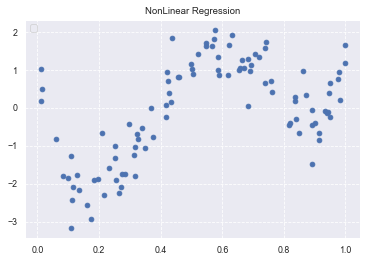

In [6]:
#真の関数からノイズを伴うデータを作成
data = np.random.rand(n).astype(np.float32)
data = np.sort(data)
target = true_func(data)

#ノイズを加える
noise = 0.5*np.random.randn(n) #最大値０.５の正規分布のノイズを印加
target = target + noise

plt.scatter(data, target)

plt.title("NonLinear Regression")
plt.legend(loc =2)

0.28168430950631385


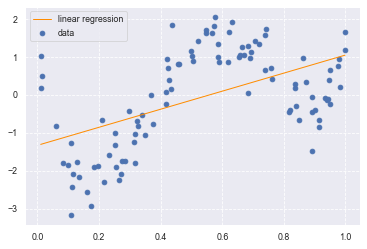

In [7]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
data = data.reshape(-1,1)
target = target.reshape(-1,1)
clf.fit(data,target)

p_lin = clf.predict(data)

plt.scatter(data,target,label = 'data')
plt.plot(data,p_lin,color = 'darkorange', marker = '', linestyle = '-', linewidth = 1, markersize = 6,label = 'linear regression')
plt.legend()
print(clf.score(data,target))

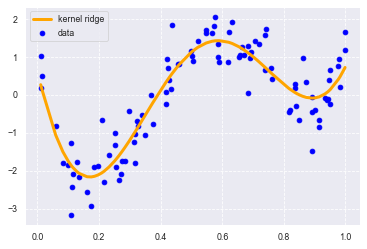

In [8]:
from sklearn.kernel_ridge import KernelRidge
clf = KernelRidge(alpha=0.0002, kernel = 'rbf')
clf.fit(data,target)
p_kridge = clf.predict(data)
plt.scatter(data,target,color='blue', label = 'data')
plt.plot(data, p_kridge, color = 'orange', linestyle='-', linewidth =3, markersize=6, label='kernel ridge')
plt.legend()

0.7952401066655401


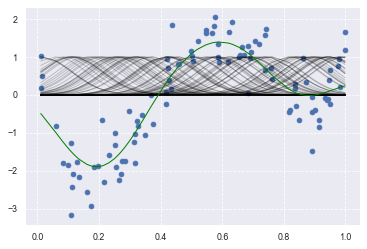

In [9]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge

kx = rbf_kernel(X=data, Y=data, gamma=50)
clf = Ridge(alpha=30)
clf.fit(kx,target)
p_ridge = clf.predict(kx)

plt.scatter(data,target, label='data')
for i in range(len(kx)):
    plt.plot(data, kx[i], color = 'black', linestyle = '-', linewidth = 1, markersize =3, label ='rbf', alpha=0.2)

plt.plot(data, p_ridge, color='green', linestyle='-', linewidth=1, markersize=3,label='ridge regression')
print(clf.score(kx, target))

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

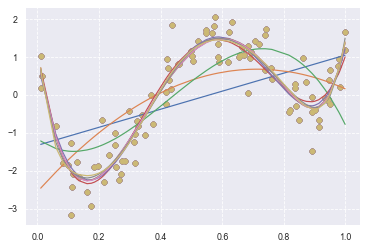

In [11]:
deg = range(1,10)
for d in deg:
    regr = Pipeline([
        ('poly', PolynomialFeatures(degree=d)),
        ('linear', LinearRegression())
    ])
    regr.fit(data,target)
    p_poly = regr.predict(data)
    plt.scatter(data, target,label='data')
    plt.plot(data,p_poly, label='polynomial of degree %d' %(d))

-4.440892098500626e-16


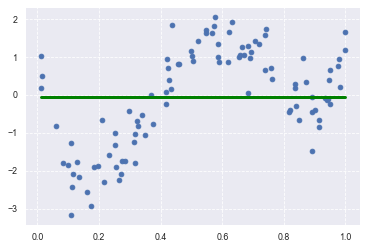

In [12]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Lasso

kx = rbf_kernel(X = data, Y = data, gamma = 5)
lasso_clf = Lasso(alpha=10000, max_iter=1000)
lasso_clf.fit(kx, target)

p_lasso = lasso_clf.predict(kx)
plt.scatter(data, target)
plt.plot(data, p_lasso, color='green', linestyle='-', linewidth=3, markersize=3)

print(lasso_clf.score(kx, target))

/Users/ishimiwataru/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ishimiwataru/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


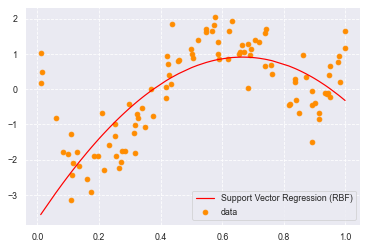

In [13]:
from sklearn import model_selection, preprocessing, linear_model, svm

clf_svr = svm.SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.1)
clf_svr.fit(data, target)
y_rbf = clf_svr.fit(data, target).predict(data)

plt.scatter(data, target, color = 'darkorange', label='data')
plt.plot(data, y_rbf, color = 'red', label='Support Vector Regression (RBF)')
plt.legend()
plt.show()